# 1_Import

In [54]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()
sns.set_style('darkgrid')
import warnings

def ignore_warn(*args, **kwargs):
    pass
warnings.war = ignore_warn

from scipy import stats
from scipy.stats import norm, skew

pd.set_option('display.float_format', lambda x : '{:.3f}'.format(x))

from subprocess import check_output
print(check_output(["ls", "./01_data"]).decode("utf8"))

sample_submission.csv
test.csv
train.csv



# 2_Data Loding

In [11]:
train = pd.read_csv('./01_data/train.csv')
test = pd.read_csv('./01_data/test.csv')
sub = pd.read_csv('./01_data/sample_submission.csv')

In [15]:
train

,ID,착과량(int),수고(m),수관폭1(min),수관폭2(max),수관폭평균,2022-09-01 새순,2022-09-02 새순,2022-09-03 새순,2022-09-04 새순,...,2022-11-19 엽록소,2022-11-20 엽록소,2022-11-21 엽록소,2022-11-22 엽록소,2022-11-23 엽록소,2022-11-24 엽록소,2022-11-25 엽록소,2022-11-26 엽록소,2022-11-27 엽록소,2022-11-28 엽록소
0,TRAIN_0000,692,275.0,287.0,292.0,289.5,2.8,2.8,2.7,2.7,...,70.978249,70.876794,70.705253,70.559603,70.427356,70.340491,70.293830,70.262422,70.169841,70.043251
1,TRAIN_0001,534,293.0,284.0,336.0,310.0,3.3,3.3,3.3,3.2,...,71.535483,71.382303,71.253604,71.092665,70.955608,70.796630,70.597550,70.565088,70.560502,70.427600
2,TRAIN_0002,634,300.0,392.0,450.0,421.0,3.0,2.9,2.9,2.9,...,71.279804,71.199570,71.144020,71.026740,70.920038,70.876723,70.710129,70.595971,70.418203,70.399578
3,TRAIN_0003,639,289.0,368.0,379.0,373.5,3.1,3.0,3.0,3.0,...,69.934615,69.884124,69.845683,69.794682,69.779813,69.614644,69.455404,69.281590,69.238689,69.133970
4,TRAIN_0004,496,306.0,353.0,358.0,355.5,3.7,3.6,3.6,3.6,...,68.313016,68.285364,68.209860,68.209458,68.040083,67.859963,67.775556,67.701456,67.504244,67.410093
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2202,TRAIN_2202,119,230.0,353.0,367.0,360.0,4.7,4.6,4.5,4.5,...,66.347384,66.293609,66.193131,66.176590,66.109845,66.008775,65.889675,65.734066,65.586656,65.560547
2203,TRAIN_2203,611,266.0,337.0,400.0,368.5,3.1,3.0,3.0,3.0,...,73.438844,73.432194,73.355195,73.329491,73.271361,73.088750,73.071705,73.069036,72.952559,72.944396
2204,TRAIN_2204,650,237.0,353.0,362.0,357.5,3.0,3.0,2.9,2.9,...,67.576066,67.404347,67.394009,67.247428,67.117025,66.933771,66.734617,66.572095,66.506006,66.479459
2205,TRAIN_2205,363,281.0,337.0,403.0,370.0,3.9,3.9,3.8,3.8,...,66.766379,66.602606,66.510781,66.334637,66.323613,66.248731,66.202532,66.108962,65.934979,65.812084


### 2-1_시계열 전처리

In [43]:
def make_timeseries(data, data_type):
    data_list = []
    
    if data_type == 'train':
        col1 = data.iloc[:,6:95]
        col2 = data.iloc[:,95:]
        
        col1_trans = col1.T
        col2_trans = col2.T
        
        col1_trans.columns = data['ID']
        col2_trans.columns = data['ID'] + str('_1')
        
        col1_trans = col1_trans.reset_index().drop('index', axis=1)
        col2_trans = col2_trans.reset_index().drop('index', axis=1)
        
        for id in data['ID']:
            md = pd.concat([col1_trans[f'{id}'], col2_trans[f'{id}_1']], axis=1)
            md = md.rename(columns={f'{id}': '새순', f'{id}_1': '엽록수'})
            md['ID'] = id
            md['착과량(int)'] = int(data.loc[data['ID']==id, '착과량(int)'])
            md['수고(m)'] = float(data.loc[data['ID']==id, '수고(m)'])
            md['수관폭(min)'] = float(data.loc[data['ID']==id, '수관폭1(min)'])
            md['수관폭(max)'] = float(data.loc[data['ID']==id, '수관폭2(max)'])
            md['수관폭평균'] = float(data.loc[data['ID']==id, '수관폭평균'])
            
            data_list.append(md)
        
        td = pd.concat(data_list)
        
        return td
    
    if data_type == 'test':
        col1 = data.iloc[:,5:94]
        col2 = data.iloc[:,94:]
        
        col1_trans = col1.T
        col2_trans = col2.T
        
        col1_trans.columns = data['ID']
        col2_trans.columns = data['ID'] + str('_1')    
        
        col1_trans = col1_trans.reset_index().drop('index', axis=1)
        col2_trans = col2_trans.reset_index().drop('index', axis=1)
        
        for id in data['ID']:
            md = pd.concat([col1_trans[f'{id}'], col2_trans[f'{id}_1']], axis=1)
            md = md.rename(columns={f'{id}': '새순', f'{id}_1': '엽록수'})
            md['ID'] = id
            md['수고(m)'] = float(data.loc[data['ID']==id, '수고(m)'])
            md['수관폭(min)'] = float(data.loc[data['ID']==id, '수관폭1(min)'])
            md['수관폭(max)'] = float(data.loc[data['ID']==id, '수관폭2(max)'])
            md['수관폭평균'] = float(data.loc[data['ID']==id, '수관폭평균'])
        
        data_list.append(md)
    
    td = pd.concat(data_list)
    
    return td

In [46]:
def make_timeseries(data, what):
    data_list = []
    
    if what == 'train':
        col1 = data.iloc[:,6:95]
        col2 = data.iloc[:,95:]
        
        tcol1 = col1.T
        tcol2 = col2.T
        
        tcol1.columns = data['ID']
        tcol2.columns = data['ID']+str('_1')
        
        tcol1= tcol1.reset_index().drop('index', axis=1)
        tcol2= tcol2.reset_index().drop('index', axis=1)
        
        for id in data['ID']:
            md = pd.concat([tcol1[f'{id}'], tcol2[f'{id}_1']], axis=1)
            md = md.rename(columns = {f'{id}' : '새순', f'{id}_1' : '엽록수'})
            md['ID'] = id
            md['착과량(int)'] = int(data.loc[data['ID'] == id, '착과량(int)'])
            md['수고(m)'] = float(data.loc[data['ID'] == id, '수고(m)'])
            md['수관폭(min)'] = float(data.loc[data['ID'] == id, '수관폭1(min)'])
            md['수관폭(max)'] = float(data.loc[data['ID'] == id, '수관폭2(max)'])
            md['수관폭평균'] = float(data.loc[data['ID'] == id, '수관폭평균'])
              
            data_list.append(md)
            
        td = pd.concat(data_list)
        
        return td
        
    if what == 'test':
        col1 = data.iloc[:,5:94]
        col2 = data.iloc[:,94:]
        
        tcol1 = col1.T
        tcol2 = col2.T
        
        tcol1.columns = data['ID']
        tcol2.columns = data['ID']+str('_1')
        
        tcol1= tcol1.reset_index().drop('index', axis=1)
        tcol2= tcol2.reset_index().drop('index', axis=1)
        
        for id in data['ID']:
            md = pd.concat([tcol1[f'{id}'], tcol2[f'{id}_1']], axis=1)
            md = md.rename(columns = {f'{id}' : '새순', f'{id}_1' : '엽록수'})
            md['ID'] = id
            md['수고(m)'] = float(data.loc[data['ID'] == id, '수고(m)'])
            md['수관폭(min)'] = float(data.loc[data['ID'] == id, '수관폭1(min)'])
            md['수관폭(max)'] = float(data.loc[data['ID'] == id, '수관폭2(max)'])
            md['수관폭평균'] = float(data.loc[data['ID'] == id, '수관폭평균'])
              
            data_list.append(md)
            
        td = pd.concat(data_list)
        
        return td

In [47]:
train1 = make_timeseries(train, 'train')
test1 = make_timeseries(test, 'test')

In [48]:
train1

,새순,엽록수,ID,착과량(int),수고(m),수관폭(min),수관폭(max),수관폭평균
0,2.8,78.336504,TRAIN_0000,692,275.0,287.0,292.0,289.5
1,2.8,78.243462,TRAIN_0000,692,275.0,287.0,292.0,289.5
2,2.7,78.166501,TRAIN_0000,692,275.0,287.0,292.0,289.5
3,2.7,78.127526,TRAIN_0000,692,275.0,287.0,292.0,289.5
4,2.7,78.058021,TRAIN_0000,692,275.0,287.0,292.0,289.5
...,...,...,...,...,...,...,...,...
84,0.6,72.271680,TRAIN_2206,17,228.0,389.0,398.0,393.5
85,0.6,72.208433,TRAIN_2206,17,228.0,389.0,398.0,393.5
86,0.5,72.070977,TRAIN_2206,17,228.0,389.0,398.0,393.5
87,0.0,71.872453,TRAIN_2206,17,228.0,389.0,398.0,393.5


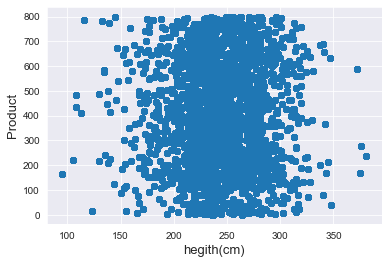

In [56]:
fig, ax = plt.subplots()
ax.scatter(x = train1['수고(m)'], y = train1['착과량(int)'])
plt.ylabel('Product', fontsize=13)
plt.xlabel('hegith(cm)', fontsize=13)
plt.show()

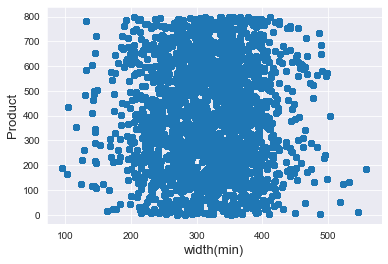

In [57]:
fig, ax = plt.subplots()
ax.scatter(x = train1['수관폭(min)'], y = train1['착과량(int)'])
plt.ylabel('Product', fontsize=13)
plt.xlabel('width(min)', fontsize=13)
plt.show()

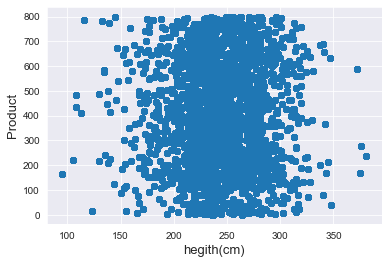

In [60]:
fig, ax = plt.subplots()
ax.scatter(x = train1['수고(m)'], y = train1['착과량(int)'])

plt.ylabel('Product', fontsize=13)
plt.xlabel('hegith(cm)', fontsize=13)
plt.show()

,새순,엽록수,ID,수고(m),수관폭(min),수관폭(max),수관폭평균
0,4.3,80.299924,TEST_0000,231.0,219.0,302.0,260.5
1,4.2,80.164425,TEST_0000,231.0,219.0,302.0,260.5
2,4.2,80.113400,TEST_0000,231.0,219.0,302.0,260.5
3,4.1,80.045268,TEST_0000,231.0,219.0,302.0,260.5
4,4.1,79.909461,TEST_0000,231.0,219.0,302.0,260.5
...,...,...,...,...,...,...,...
84,0.6,64.602840,TEST_2207,244.0,380.0,391.0,385.5
85,0.5,64.541821,TEST_2207,244.0,380.0,391.0,385.5
86,0.0,64.367357,TEST_2207,244.0,380.0,391.0,385.5
87,0.0,64.197975,TEST_2207,244.0,380.0,391.0,385.5


In [20]:
train.columns

Index(['ID', '착과량(int)', '수고(m)', '수관폭1(min)', '수관폭2(max)', '수관폭평균',
       '2022-09-01 새순', '2022-09-02 새순', '2022-09-03 새순', '2022-09-04 새순',
       ...
       '2022-11-19 엽록소', '2022-11-20 엽록소', '2022-11-21 엽록소', '2022-11-22 엽록소',
       '2022-11-23 엽록소', '2022-11-24 엽록소', '2022-11-25 엽록소', '2022-11-26 엽록소',
       '2022-11-27 엽록소', '2022-11-28 엽록소'],
      dtype='object', length=184)

# 3_입력 Feature와 Target(착과량) 분할

In [50]:
X_train = train1.drop(['ID', '착과량(int)'], axis=1)
y_train = train1['착과량(int)']

# 4_모델 선언 및 학습

In [51]:
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor()

model.fit(X_train, y_train)

DecisionTreeRegressor()

# 5_추론

In [52]:
pred = model.predict(test1.drop(['ID'], axis=1))

In [53]:
len(pred)

196512

# 6_제출 (Submission)

In [31]:
sample_submission = pd.read_csv('./01_data/sample_submission.csv')

In [35]:
len(sample_submission)

2208

In [32]:
sample_submission['착과량(int)'] = pred
sample_submission.to_csv('./02_submission/submit.csv', index=False)

ValueError: Length of values (89) does not match length of index (2208)

In [26]:
sample_submission.head()

,ID,착과량(int)
0,TEST_0000,260.0
1,TEST_0001,758.0
2,TEST_0002,101.0
3,TEST_0003,483.0
4,TEST_0004,687.0
